2-Dimensional Fourier Transform

1. Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from matplotlib.image import imread


2. Load and display the image

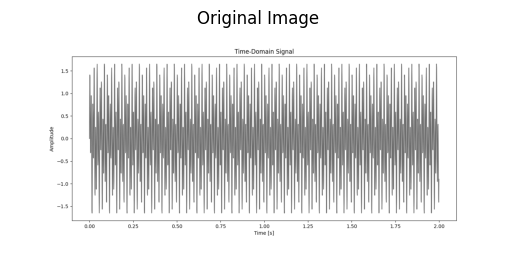

In [4]:
# Load the image (grayscale for simplicity)
def load_image(image_path):
    image = imread(image_path)
    if image.ndim == 3:
        # Convert to grayscale by averaging the RGB channels
        image = np.mean(image, axis=2)
    return image

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

image = load_image('/Users/bangbui/workspace/AlgorithmInPython/representations/Figure_1.png')
show_image(image)

3. Compute the 2D Fourier Transform

In [5]:
def fourier_transform(image):
    # Compute the 2D Fourier Transform
    fourier_image = fft2(image)
    # Shift the zero frequency component to the center
    fourier_image = fftshift(fourier_image)
    # Compute the magnitude spectrum
    magnitude_spectrum = np.log(np.abs(fourier_image) + 1)  # Add 1 to avoid log(0)
    return fourier_image, magnitude_spectrum

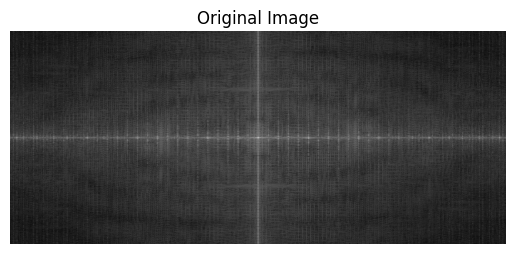

In [6]:
fourier_image, magnitude_spectrum = fourier_transform(image)
show_image(magnitude_spectrum)

4. Apply a high-pass filter mask 

In [8]:
def high_pass_filter_mask(image, fourier_image):
    # Create a high-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=np.uint8)
    r = 50  # Radius of the low-frequency region to block
    center = [crow, ccol]
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)
    mask[dist_from_center <= r] = 0

    # Apply the mask and inverse FFT
    fft_image_shifted_filtered = fourier_image * mask
    fft_image_filtered = np.fft.ifftshift(fft_image_shifted_filtered)
    image_filtered = np.fft.ifft2(fft_image_filtered).real
    return image_filtered


5. Display the Filtered Image

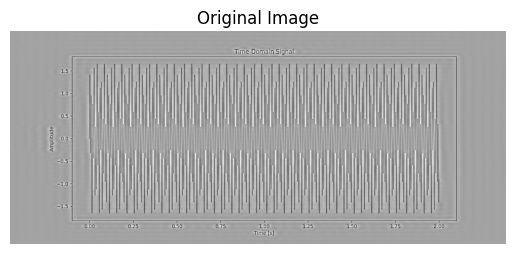

In [9]:
image_filtered = high_pass_filter_mask(image, fourier_image)
show_image(image_filtered)